# Process taken in analysing the data

* The data is read to perform initial inspection so as to have an idea of the problem to be solved.
* The quantity (shape) of the data is observed including the "feature" data types.
* The features are checked for errors and missing values.
* The errors are corrected if they are minor while possible techniques are used to fill-in missing values.
* Outliers are checked.
* Graphs are plotted to see the possible effects of including or excluding outliers.
* Analyses and inference are drawn from the descriptive statistics
* Recommendations are drawn for business purpose.

In [1]:
import pandas as pd
df1=pd.read_csv("dsbase.csv", encoding="latin-1")
print(df1)

#the output below shows that there are three main information in the dataset: Gender, Age and spend.

         CID  GENDER  AGE       SPEND
0          0    MALE   22  253.634165
1          1  FEMALE   28  201.438190
2          2    MALE   29  160.000000
3          3    MALE   28  161.207419
4          4    MALE   21  160.000000
5          5    MALE   29  315.736724
6          6  FEMALE   25  245.142347
7          7  FEMALE   28  236.169459
8          8  FEMALE   29  199.851566
9          9  FEMALE   21  210.433502
10        10  FEMALE   21  195.034750
11        11  FEMALE   21  191.953731
12        12    MALE   27  197.497237
13        13    MALE   29  252.710639
14        14  FEMALE   21  219.882536
15        15  FEMALE   26  232.536818
16        16  FEMALE   28  225.783378
17        17  FEMALE   29  196.076847
18        18  FEMALE   28  211.572493
19        19    MALE   28  292.822734
20        20     NaN   25  208.816865
21        21  FEMALE   27  180.768065
22        22    MALE   29  199.731736
23        23  FEMALE   26  130.975781
24        24    MALE   28  278.646378
25        25

In [2]:
df1.dtypes #data types

CID         int64
GENDER     object
AGE         int64
SPEND     float64
dtype: object

In [3]:
df1.shape



(100000, 4)

In [4]:
#The result above shows there are 100,000 rows and 4 columns
#But let us check if there are missing vaules in any of the three "features" of the dataset.

# DATA INSPECTION AND CLEANING (MISSING VALUES and TYPOS)

In [5]:
df1.describe(include="all")

,CID,GENDER,AGE,SPEND
count,100000.000000,98774,100000.000000,98768.000000
unique,NaN,3,NaN,NaN
top,NaN,FEMALE,NaN,NaN
freq,NaN,59270,NaN,NaN
mean,49999.500000,NaN,24.519760,210.813673
std,28867.657797,NaN,5.576112,48.809510
min,0.000000,NaN,0.000000,64.016263
25%,24999.750000,NaN,22.000000,176.044081
50%,49999.500000,NaN,24.000000,205.897784
75%,74999.250000,NaN,27.000000,234.500880


In [6]:
#From the output above, you will notice that there are missing values for Gender and age as we expect a total "count" of 
#of each feature to have 100,000 rows but we see that "Gender" and "Spend" has only 98,774 and 98,768.

In [7]:
# Why do we have fewer data?
#Could it be there were typographical errors or missing values?
#Let us find out

In [8]:
df1.isnull().sum()

CID          0
GENDER    1226
AGE          0
SPEND     1232
dtype: int64

In [9]:
#The result above gives a count of the number of missing values in each column
#Let us see if the total value sums up


In [10]:
gender = 1226 + 98774
gender

100000

In [11]:
age = 1232 + 98768
age

100000

In [12]:
# From the above, we have confirmed there are missing values and we will solve this later on.

In [13]:
# Now, let us count the number of male and female in the dataset

In [14]:
df1.GENDER.value_counts() # An attempt to count the number of MALE and FEMALE

FEMALE     59270
MALE       39435
Má ALE       69
Name: GENDER, dtype: int64

In [15]:
#We have seen the error. the word "MALE" was not spelt correctly in some instance

In [16]:
#The easiest way is to select what is not in this list ['MALE','FEMALE', 'NaN']. remember, "NaN" means it is completly
#missing

In [17]:
wrongly_spelt_or_no_gender = df1.loc[~df1['GENDER'].isin(['MALE','FEMALE'])]

In [18]:
wrongly_spelt_gender = wrongly_spelt_or_no_gender[~wrongly_spelt_or_no_gender['GENDER'].isnull()]

In [19]:
wrongly_spelt_gender.head(n=10)

,CID,GENDER,AGE,SPEND
570,570,Má ALE,20,186.656132
664,664,Má ALE,21,189.643847
1322,1322,Má ALE,22,199.181498
7156,7156,Má ALE,22,NaN
8345,8345,Má ALE,24,204.119459
9974,9974,Má ALE,21,194.692848
17003,17003,Má ALE,25,206.453431
17598,17598,Má ALE,28,219.052786
17988,17988,Má ALE,27,219.510486
21240,21240,Má ALE,22,200.272357


In [20]:
wrongly_spelt_gender['GENDER'] = 'MALE' # Fixing wrongly spelt male gender

/Users/popoolaebenezer/.virtualenvs/testenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
wrongly_spelt_gender.head(n=10) # This is now fixed

,CID,GENDER,AGE,SPEND
570,570,MALE,20,186.656132
664,664,MALE,21,189.643847
1322,1322,MALE,22,199.181498
7156,7156,MALE,22,NaN
8345,8345,MALE,24,204.119459
9974,9974,MALE,21,194.692848
17003,17003,MALE,25,206.453431
17598,17598,MALE,28,219.052786
17988,17988,MALE,27,219.510486
21240,21240,MALE,22,200.272357


In [22]:
#This is exactly 69 GENDER we were looking for., wrongly_spelt_or_no_gender[wrongly_spelt_or_no_gender['GENDER'].isnull()]

In [23]:
#To correct this, we replace the GENDER with the right name.

In [24]:
combined_data = [df1.loc[df1['GENDER'].isin(['MALE','FEMALE'])] , wrongly_spelt_gender, wrongly_spelt_or_no_gender[wrongly_spelt_or_no_gender['GENDER'].isnull()]]

In [25]:
combined_data = pd.concat(combined_data)
combined_data.head(n=10)

,CID,GENDER,AGE,SPEND
0,0,MALE,22,253.634165
1,1,FEMALE,28,201.438190
2,2,MALE,29,160.000000
3,3,MALE,28,161.207419
4,4,MALE,21,160.000000
5,5,MALE,29,315.736724
6,6,FEMALE,25,245.142347
7,7,FEMALE,28,236.169459
8,8,FEMALE,29,199.851566
9,9,FEMALE,21,210.433502


## Dealing with missing

In [26]:
#SINCE THERE ARE MORE FEMALE THAN MALE, I AM ASSUMING MISSING GENDERS ARE FEMALE INSTEAD OF DELETING THOSE RECORDS

In [27]:
combined_data['GENDER'].fillna('FEMALE', inplace=True)

In [28]:
combined_data.isnull().sum() # CONFIRMING IF ALL THE NULL VALUES IN GENDER HAS BEEN SOLVED

CID          0
GENDER       0
AGE          0
SPEND     1232
dtype: int64

In [29]:
# FIXING ISSUES WITH MISSING "SPEND" AMOUNT

In [30]:
# HERE, I AM FILLING THE MISSING VALUES WITH THE MEAN "SPEND"

In [31]:
combined_data['SPEND'].fillna((combined_data['SPEND'].mean()), inplace=True)

In [32]:
combined_data.isnull().sum() # NOW THERE IS NO MISSING VALAUES

CID       0
GENDER    0
AGE       0
SPEND     0
dtype: int64

In [33]:
combined_data.describe(include="all")

,CID,GENDER,AGE,SPEND
count,100000.000000,100000,100000.000000,100000.000000
unique,NaN,2,NaN,NaN
top,NaN,FEMALE,NaN,NaN
freq,NaN,60496,NaN,NaN
mean,49999.500000,NaN,24.519760,210.813673
std,28867.657797,NaN,5.576112,48.507909
min,0.000000,NaN,0.000000,64.016263
25%,24999.750000,NaN,22.000000,176.497021
50%,49999.500000,NaN,24.000000,206.559894
75%,74999.250000,NaN,27.000000,234.047062


# OUTLIER DETECTION

In [34]:

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#plt.scatter(combined_data['AGE'], combined_data['SPEND'])

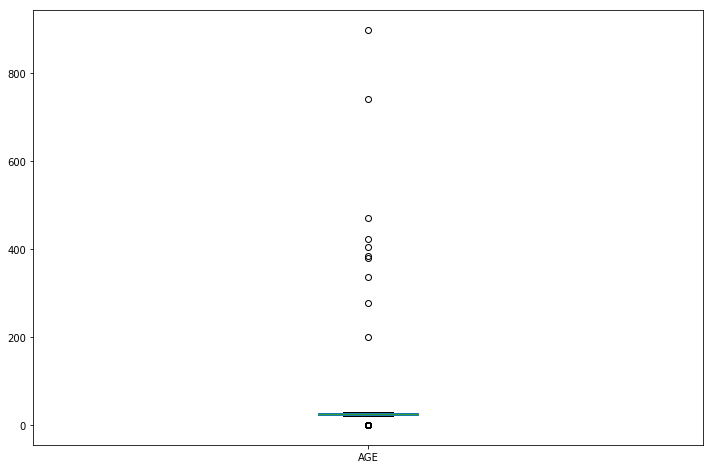

In [35]:
combined_data['AGE'].plot(kind='box', figsize=(12,8))
plt.show()

# THE FIGURE BELOW SHOWS THERE ARE OUTLIERS IN THE 'AGE'as it is evident that some ages are 200 and above. 
# this is not realistic

In [36]:
combined_data['AGE'].unique() # We can see that age 0 and anything greater than 201 can be discarded or replaced

array([ 22,  28,  29,  21,  25,  27,  26,  24,  23,  20,   0, 384, 201,
       741, 336, 404, 899, 380, 422, 277, 471])

In [37]:
combined_data.drop('CID', axis=1, inplace=True)

In [38]:
combined_data.groupby([ 'GENDER', 'AGE']).mean() # GROUP The average spending GENDER and AGE

SPEND
GENDER AGE             
FEMALE 0     210.009046
       20    190.325174
       21    193.891937
       22    197.730182
       23    202.105781
       24    205.574616
       25    209.591997
       26    213.663104
       27    218.224460
       28    221.852724
       29    226.562954
       277  1209.037406
       380  1622.147598
       384  1698.583319
       404  1726.829656
       422  1781.677352
       471  1995.304900
       741  3056.745376
       899  3724.453092
MALE   0     204.671134
       20    203.065802
       21    203.857436
       22    209.063663
       23    210.268018
       24    213.859034
       25    216.768200
       26    217.931392
       27    222.403307
       28    222.959385
       29    227.185998
       201   948.649269
       336  1550.561908

In [39]:
all_names_index =combined_data.groupby([ 'GENDER', 'AGE']).mean()

In [40]:
female_spending=combined_data[combined_data.GENDER == 'FEMALE']

In [41]:
male_spending=combined_data[combined_data.GENDER == 'MALE']

In [42]:
average_female_spending_by_age=female_spending.groupby(['AGE']).mean()
average_female_spending_by_age.rename(index=str, columns={"SPEND":"AVERAGE SPENDING"}, inplace=True)

## A plot of the average spending by age without excluding the outliers in "AGE" 

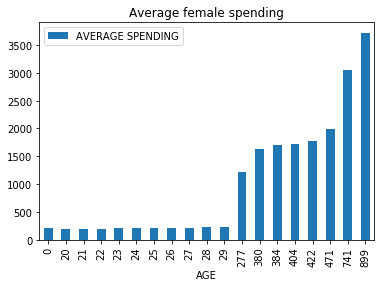

In [43]:
average_female_spending_by_age.plot(kind='bar', title='Average female spending')

In [44]:
average_male_spending_by_age=male_spending.groupby(['AGE']).mean()
average_male_spending_by_age.rename(index=str, columns={"SPEND":"AVERAGE SPENDING"}, inplace=True)

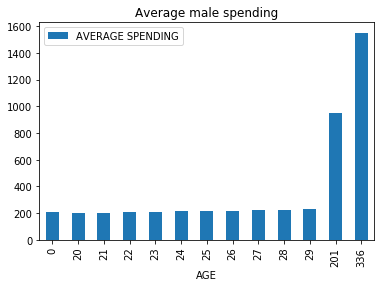

In [45]:
average_male_spending_by_age.plot(kind='bar', title='Average male spending')

## A plot of the average spending by age excluding the outliers in "AGE"

### The meaningful age range is therefore 20 to 29

In [46]:
average_male_spending_by_age =average_male_spending_by_age.loc['20':'29']

In [47]:
average_female_spending_by_age =average_female_spending_by_age.loc['20':'29']

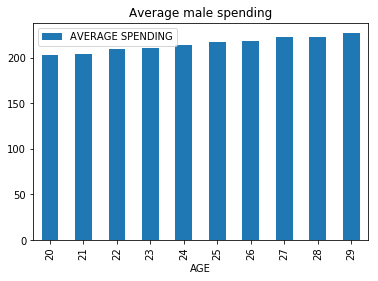

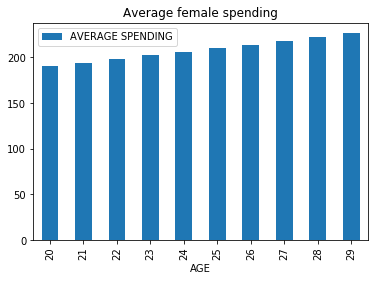

In [48]:
average_male_spending_by_age.plot(kind='bar', title='Average male spending')
average_female_spending_by_age.plot(kind='bar', title='Average female spending')

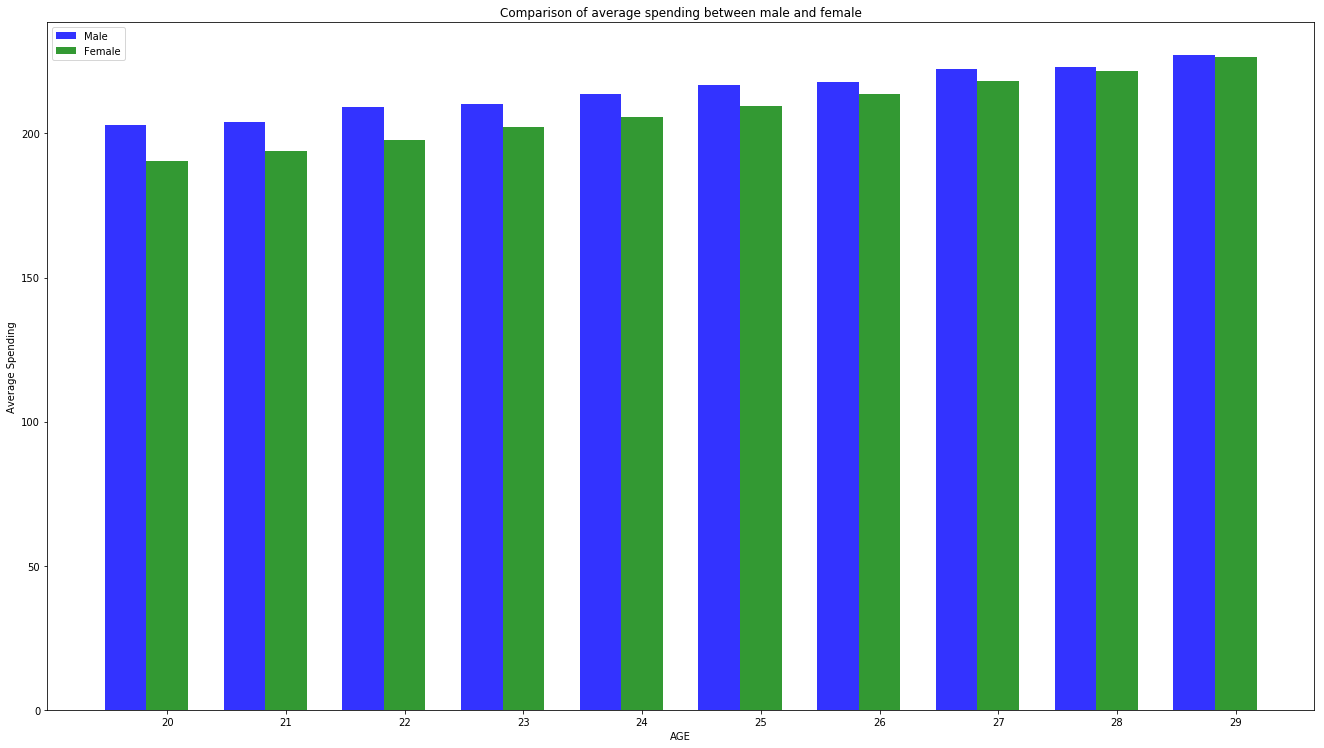

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# data to plot
n_groups = 10
 
# create plot
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, average_male_spending_by_age['AVERAGE SPENDING'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Male')
 
rects2 = plt.bar(index + bar_width, average_female_spending_by_age['AVERAGE SPENDING'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Female')
 
plt.xlabel('AGE')
plt.ylabel('Average Spending')
plt.title('Comparison of average spending between male and female')
plt.xticks(index + bar_width, (20,21,22,23,24,25,26,27,28,29))
plt.legend()
 
plt.tight_layout()
plt.show()

## Observation from the plot above

### 1. The average spending of males does not change significantly with increasing age.

### 2. There is a  steady increase in the average spending of females as the age increases.

### 3 Though the average spending of males across the age range is greater than that of females, the difference reduces as the age incerases.